In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
path = "preprocessed3.csv"
df = pd.read_csv(path, index_col=0)
df.columns.values.tolist().index('rain_sum (mm)')
y = df.iloc[:,df.columns.values.tolist().index('rain_sum (mm)')]
X = df.drop(columns='rain_sum (mm)')

In [4]:
def nn(X,y,hidden,iter,solv,act):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create an instance of the MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(hidden), max_iter=iter, random_state=0,solver=solv,activation=act,learning_rate_init=0.0001)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    y_predtrain = mlp.predict(X_train)

    # Calculate the MSE on the test set
    msetrain = mean_squared_error(y_train, y_predtrain)
    # print('mse train: ',msetrain)
    mse = mean_squared_error(y_test, y_pred)
    # print('mse test: ',mse)
    loss = mlp.best_loss_
    # print("best loss: ", loss)
    return mse

mse train:  35.1910375373125
mse test:  46.3081123012561
R2 =  0.5285876721683989


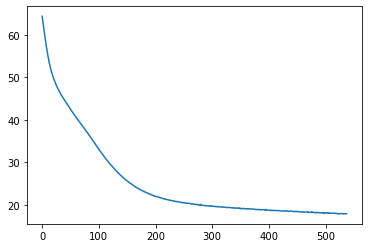

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,30,25), max_iter=10000, random_state=0,solver='adam',activation='logistic',
learning_rate_init=0.0001, beta_1=0.5, beta_2=0.5, alpha=0.005)
# mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_predtrain = mlp.predict(X_train)

# Calculate the MSE on the test set
msetrain = mean_squared_error(y_train, y_predtrain)
print('mse train: ',msetrain)

mse = mean_squared_error(y_test, y_pred)
print('mse test: ',mse)

epoch = range(mlp.n_iter_)
plt.plot(epoch, mlp.loss_curve_)

r_squared = mlp.score(X_test, y_test)
print ('R2 = ', r_squared)


In [ ]:
# mlp = MLPRegressor(hidden_layer_sizes=(50,20,20), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.0001, beta_1=0.5, beta_2=0.5, alpha=0.005) , R2 =  0.5314222332925425
# mlp = MLPRegressor(hidden_layer_sizes=(50,40,20), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.0001, beta_1=0.5, beta_2=0.5, alpha=0.005) , R2 =  0.5321876628477218


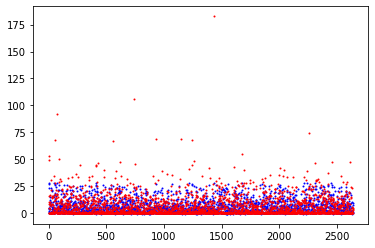

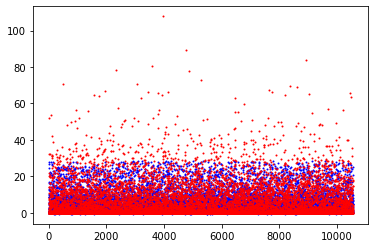

In [12]:
plt.scatter(range(len(y_pred)),y_pred,s=1,c='blue')
plt.scatter(range(len(y_test)),y_test,s=1,c='red')
plt.show()
plt.scatter(range(len(y_predtrain)),y_predtrain,s=1,c='blue')
plt.scatter(range(len(y_train)),y_train,s=1,c='red')
plt.show()